<a href="https://colab.research.google.com/github/2SUBDA/Block3_Run/blob/Week-7a/Week7a_Bayes_PYMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Updated version of *Showcase* problem from Pilson (2017) - for errors - check version of PYMC - this is for PYMC3

In [ ]:
# A look at using pymc for doing Bayes in Python

# Based on Pilon (2017)

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm                               # used for creating MC / Bayes estimate 
import scipy.optimize as sop                    # used for finding minimum - optimization function
import scipy.stats as stats                    # used for normal dist


In [ ]:
# THIS BLOCK OF CODE SETS UP THE BASICS FOR PLOTTING
figsize(12.5, 9)

norm_pdf = stats.norm.pdf

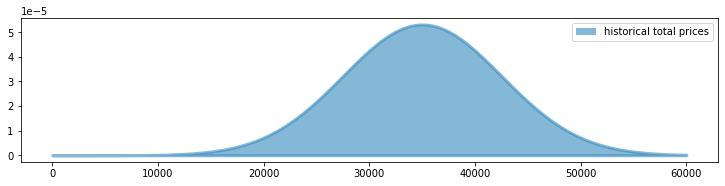

In [ ]:
# THIS PLOT SHOWS HISTORICAL PRICES GIVEN THE PACKAGE (SNOWBLOWER & TRIP)
# HAS A MEAN OF $35,000 AND A VARIANCE OF $7500

plt.subplot(311)
x = np.linspace(0, 60000, 200)
sp1 = plt.fill_between(x, 0, norm_pdf(x, 35000, 7500),
                       color="#348ABD", lw=3, alpha=0.6,
                       label="historical total prices")
p1 = plt.Rectangle((0, 0), 1, 1, fc=sp1.get_facecolor()[0])
plt.legend([p1], [sp1.get_label()])

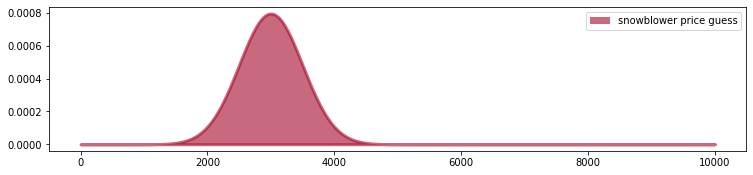

In [ ]:
# THIS PLOT SHOWS HISTORICAL PRICE ESTIMATES GIVEN THE ITEM (SNOWBLOWER)
# HAS A MEAN OF $3000 AND A VARIANCE OF $500

plt.subplot(312)
x = np.linspace(0, 10000, 200)
sp2 = plt.fill_between(x, 0, norm_pdf(x, 3000, 500),
                       color="#A60628", lw=3, alpha=0.6,
                       label="snowblower price guess")

p2 = plt.Rectangle((0, 0), 1, 1, fc=sp2.get_facecolor()[0])
plt.legend([p2], [sp2.get_label()])

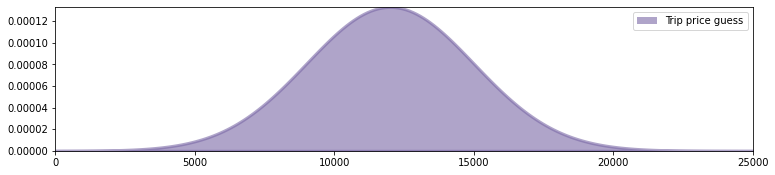

In [ ]:
# THIS PLOT SHOWS HISTORICAL PRICES GIVEN THE ITEM (TRIP)
# HAS A MEAN OF $12,000 AND A VARIANCE OF $3000

plt.subplot(313)
x = np.linspace(0, 25000, 200)
sp3 = plt.fill_between(x, 0, norm_pdf(x, 12000, 3000),
                       color="#7A68A6", lw=3, alpha=0.6,
                       label="Trip price guess")
plt.autoscale(tight=True)
p3 = plt.Rectangle((0, 0), 1, 1, fc=sp3.get_facecolor()[0])
plt.legend([p3], [sp3.get_label()]);

In [ ]:
# THIS BLOCK SETS THE INITIAL DISTRIBUTIONS
data_mu = [3e3, 12e3]

data_std = [5e2, 3e3]

mu_prior = 35e3
std_prior = 75e2

In [ ]:
# THIS BLOCK ESTABLISHES MODEL
# NOTE - ON ERRORS - CHECK VERSION OF PYMC

with pm.Model() as model:
  true_price = pm.Normal("true_price", mu=mu_prior, sigma=std_prior)
  prize_1 = pm.Normal("first_prize", mu=data_mu[0], sigma=data_std[0])
  prize_2 = pm.Normal("second_prize", mu=data_mu[1], sigma=data_std[1])

  price_estimate = prize_1 + prize_2

  logp = pm.Normal.dist(mu=price_estimate, sigma=(3e3)).logp(true_price)
  error = pm.Potential("error", logp)
  
  trace = pm.sample()
  
price_trace = trace["true_price"]

/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc911420690>,
      dtype=object)

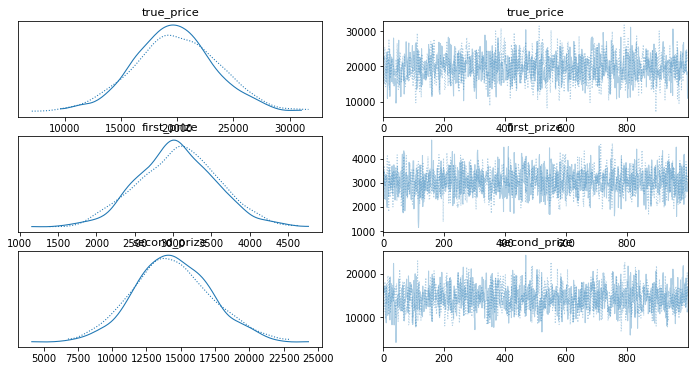

In [ ]:
  import arviz as az
  
  az.plot_trace(trace)


# Working section for creating guesses

In [ ]:
data = trace.to_dataframe()

In [ ]:
data.head()

,chain,draw,"(posterior, true_price)","(posterior, first_prize)","(posterior, second_prize)","(sample_stats, diverging)","(sample_stats, energy_error)","(sample_stats, energy)","(sample_stats, perf_counter_diff)","(sample_stats, perf_counter_start)",...,"(sample_stats, n_steps)","(sample_stats, acceptance_rate)","(sample_stats, index_in_trajectory)","(sample_stats, process_time_diff)","(sample_stats, step_size_bar)","(sample_stats, step_size)","(sample_stats, tree_depth)","(sample_stats, max_energy_error)","(sample_stats, lp)","(sample_stats, largest_eigval)"
0,0,0,35000.0,3000.000000,12000.0,False,0.008080,-38.734261,0.012807,1841.064334,...,99.0,0.737430,-37,0.013562,0.02565,0.022738,7,0.668378,43.492633,NaN
1,0,1,35000.0,3000.000001,12000.0,False,0.289475,-42.161224,0.006142,1841.077279,...,49.0,0.729669,-14,0.006142,0.02565,0.022738,6,0.683906,42.891293,NaN
2,0,2,35000.0,3000.000001,12000.0,False,0.291671,-41.966476,0.001381,1841.085461,...,3.0,0.790471,-1,0.001794,0.02565,0.022738,2,0.363138,42.320972,NaN
3,0,3,35000.0,3000.000001,12000.0,False,-0.336544,-41.680476,0.002604,1841.087014,...,11.0,0.935024,5,0.002640,0.02565,0.022738,4,-0.465757,42.647135,NaN
4,0,4,35000.0,3000.000003,12000.0,False,-0.223546,-41.833658,0.006611,1841.089848,...,49.0,0.837727,-20,0.006809,0.02565,0.022738,6,0.542218,43.119537,NaN


In [ ]:
## LOSS FUNCTION FOR RISK ADVERSE CONTESTANT
## FINDING A LOCAL MINIMUM NOT GLOBAL MINIMUM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wi

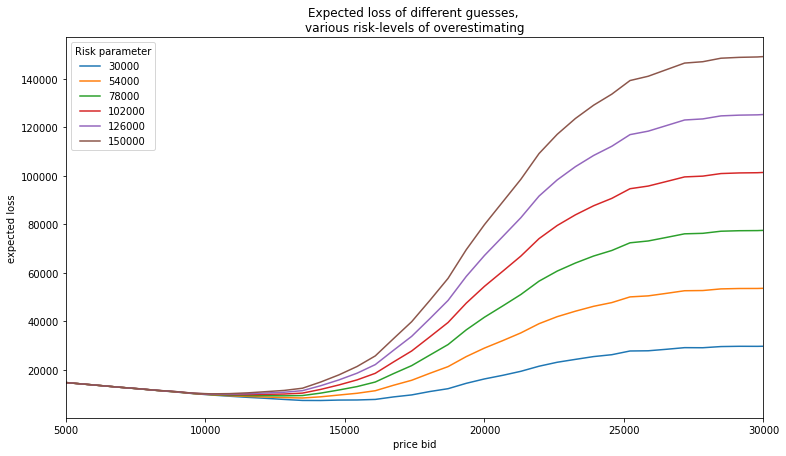

In [ ]:
figsize(12.5, 7)
# numpy friendly showdown_loss


def showdown_loss(guess, true_price, risk=80000):
        loss = np.zeros_like(true_price)
        ix = true_price < guess
        loss[~ix] = np.abs(guess - true_price[~ix])
        close_mask = [abs(true_price - guess) <= 250]
        loss[close_mask] = -2 * true_price[close_mask]
        loss[ix] = risk
        return loss


guesses = np.linspace(5000, 50000, 70)
risks = np.linspace(30000, 150000, 6)
expected_loss = lambda guess, risk: \
    showdown_loss(guess, trace[true_price], risk).mean()

for _p in risks:
    results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, results, label="%d" % _p)

plt.title("Expected loss of different guesses, \nvarious risk-levels of \
overestimating")
plt.legend(loc="upper left", title="Risk parameter")
plt.xlabel("price bid")
plt.ylabel("expected loss")
plt.xlim(5000, 30000);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


minimum at risk 30000: 15018.37
minimum at risk 54000: 13364.94


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


minimum at risk 78000: 12404.76
minimum at risk 102000: 11252.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


minimum at risk 126000: 11252.95
minimum at risk 150000: 11252.95


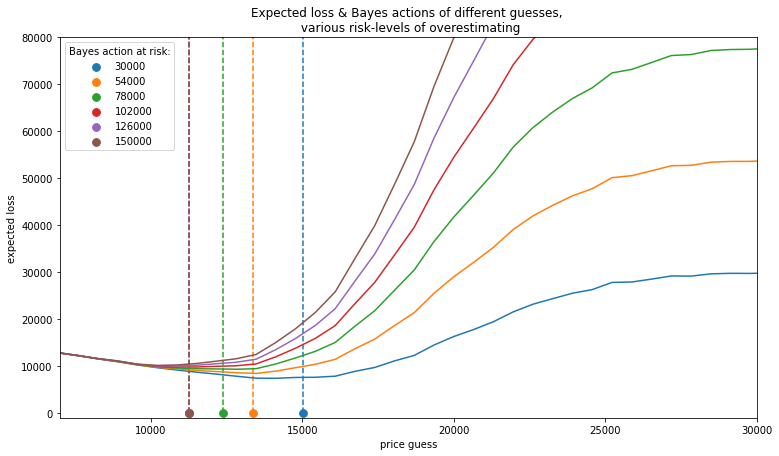

In [ ]:
ax = plt.subplot(111)


for _p in risks:
    _color = next(ax._get_lines.prop_cycler)
    _min_results = sop.fmin(expected_loss, 15000, args=(_p,),disp = False)
    _results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, _results , color = _color['color'])
    plt.scatter(_min_results, 0, s = 60, \
                color= _color['color'], label = "%d"%_p)
    plt.vlines(_min_results, 0, 120000, color = _color['color'], linestyles="--")
    print("minimum at risk %d: %.2f" % (_p, _min_results))

plt.title("Expected loss & Bayes actions of different guesses, \n \
various risk-levels of overestimating")
plt.legend(loc="upper left", scatterpoints=1, title="Bayes action at risk:")
plt.xlabel("price guess")
plt.ylabel("expected loss")
plt.xlim(7000, 30000)
plt.ylim(-1000, 80000);